In [3]:
import numpy as np
import matplotlib.pyplot as plt

from imageio import imread

(512, 512)


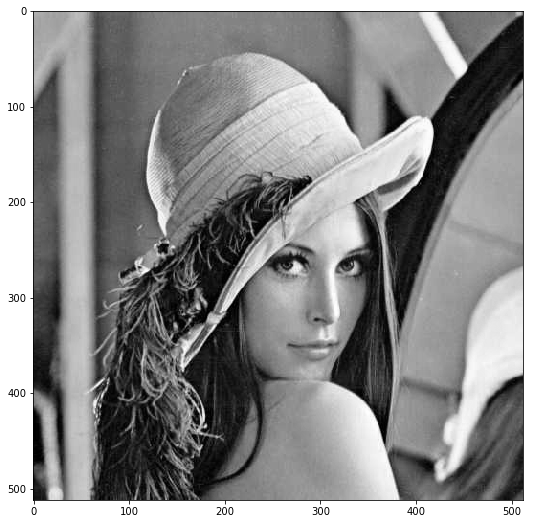

In [5]:
im = imread("../../samples/lena.jpg", pilmode="L")

#im = resize(im, (128, 128), anti_aliasing=True, mode="reflect")

print(im.shape)

fig, ax = plt.subplots(figsize=(16,9))
ax.imshow(im, vmin=0, vmax=255, cmap=plt.cm.gray)
plt.show()

In [12]:
def rank_filter(im, size, op):
    
    h, w = im.shape
    dx = dy = size // 2
    
    res = np.zeros_like(im)
    for i in range(h):
        for j in range(w):
            y0 = max(i - dy, 0)
            y1 = i + dy
            x0 = max(j - dx, 0)
            x1 = j + dx
            
            res[i, j] = op(im[y0:y1, x0:x1])
            
    
    return res

from functools import partial

min_filter = partial(rank_filter, op=np.min)
max_filter = partial(rank_filter, op=np.max)
med_filter = partial(rank_filter, op=np.median)


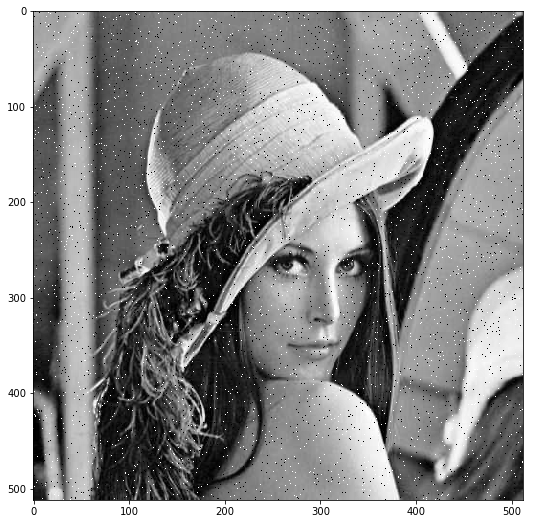

In [13]:
SALT=-1
PEPPER=1

mask = np.random.choice([SALT, PEPPER, 0], size=im.shape, p=[0.01, 0.01, 0.98])

noisy_im = im.copy()
noisy_im[mask == SALT] = 255
noisy_im[mask == PEPPER] = 0


fig, ax = plt.subplots(figsize=(16,9))

ax.imshow(noisy_im, cmap="gray")

plt.show()
plt.close()

In [24]:
size = 19

%time im_min = min_filter(noisy_im, size)
%time im_max = max_filter(noisy_im, size)
%time im_med = med_filter(noisy_im, size)


CPU times: user 4.04 s, sys: 168 ms, total: 4.21 s
Wall time: 3.99 s
CPU times: user 3.88 s, sys: 139 ms, total: 4.01 s
Wall time: 3.82 s
CPU times: user 14.2 s, sys: 0 ns, total: 14.2 s
Wall time: 14.2 s


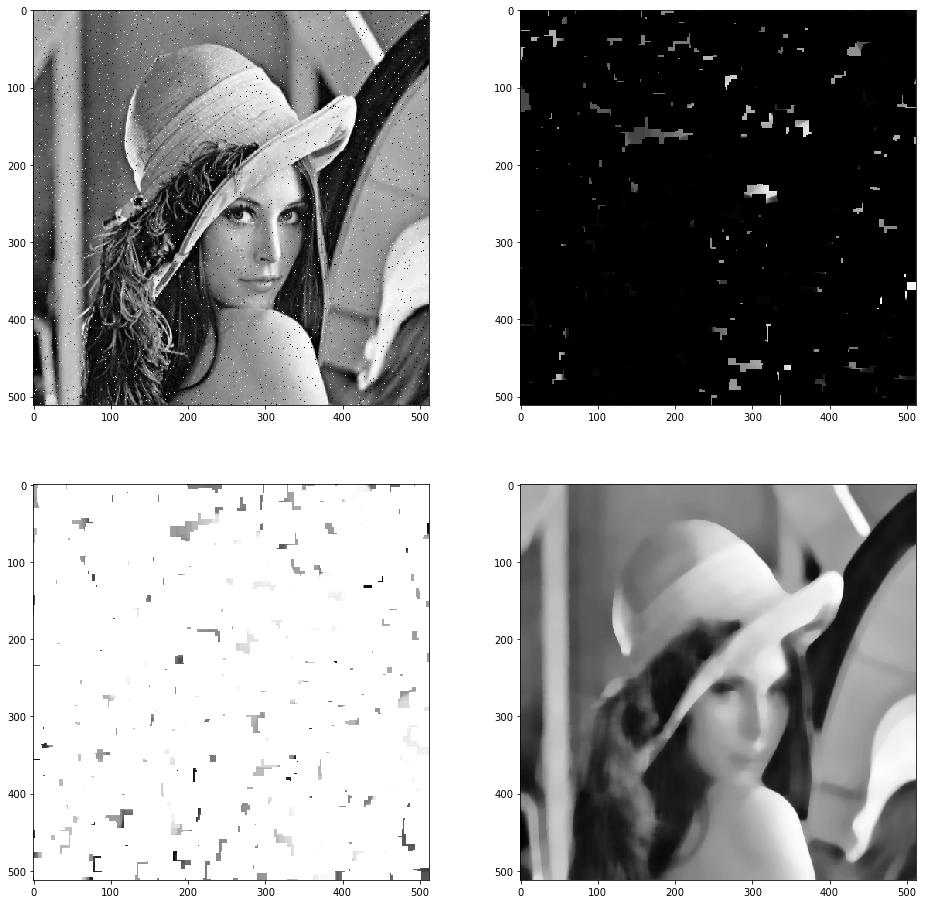

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(16,16))

axs[0,0].imshow(noisy_im, cmap="gray")
axs[0,1].imshow(im_min, cmap="gray")
axs[1,0].imshow(im_max, cmap="gray")
axs[1,1].imshow(im_med, cmap="gray")

plt.show()
plt.close()